# 接口说明
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False,svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)

* 这个方法不支持稀疏输入

#### 参数
* n_components： 要保留的纬度的数量,如果为空，则n_components == min(n_samples,n_features)
类型：int 或者 string，缺省时默认为None，所有成分被保留。
        if n_components == ‘mle’ and svd_solver == ‘full’，PCA会用MLE算法自动选择一定数量的主成分来降维。
        if 0 < n_components < 1 and svd_solver == ‘full’,代表指定了主成分方差所占半分比，算法会自动确定要保留的纬度以使主成分大于所指定阈值；
        n_components cannot be equal to n_features for svd_solver == ‘arpack’.

* copy: 类型：bool，True或者False，缺省时默认为True。
意义：表示是否在运行算法时，将原始训练数据复制一份。
        若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；
        若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。
* whiten 类型：bool，缺省时默认为False
        意义：白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.
* svd_solver: 即指定奇异值分解SVD的方法
        由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。

#### 属性
*  components_：array, shape (n_components, n_features)特征空间中的主轴，表示数据中最大方差的方向。返回具有最大方差的成分。
* explained_variance_ : array, shape (n_components,) 每个主成分的方差
*  explained_variance_ratio_ ：返回 所保留的n个成分各自的方差百分比。
*  n_components_：返回所保留的成分个数n。
* singular_values_ : array, shape (n_components,) 对应于每个选定成分的奇异值。奇异值等于低维空间中主成分变量的2-范数。
* mean_ : array, shape (n_features,) 每个特征的经验平均值，从训练集中得到
* n_components_ : int 主成分数量。 从参数中得到。 如果参数中被设置成‘mle’或者0-1之间的数字，这个数字是从输入数据中计算得到； 如果参数设置未空，n_components == min(n_samples,n_features)； 

# PCA 2D projection of Iris dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data
y = iris.target
target_names = iris.target_names
print(X)
print(y)
print(target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
pca = PCA(n_components=2)
xr = pca.fit(X).transform(X)

print('explained variance ratio(first two components): %s'
      % str(pca.explained_variance_ratio_))

print(xr)

explained variance ratio(first two components): [0.92461621 0.05301557]
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384

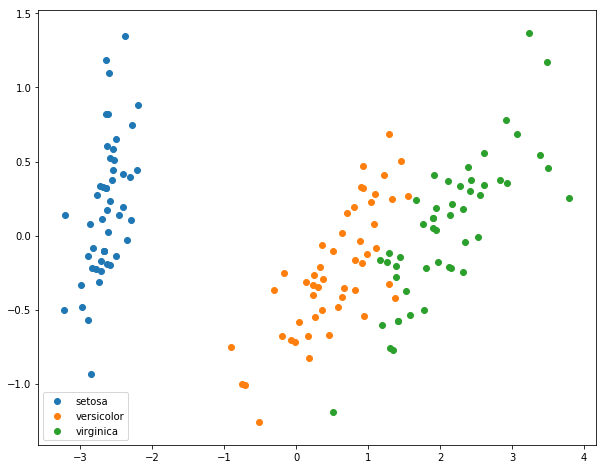

In [5]:
plt.figure(figsize=(10,8))
for i in range(3):
    plt.scatter(xr[:,0][y==i],xr[:,1][y==i],label=target_names[i])
plt.legend(loc='best')
plt.show()

## 展示pca算法的属性

In [6]:
# 主成分向量
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

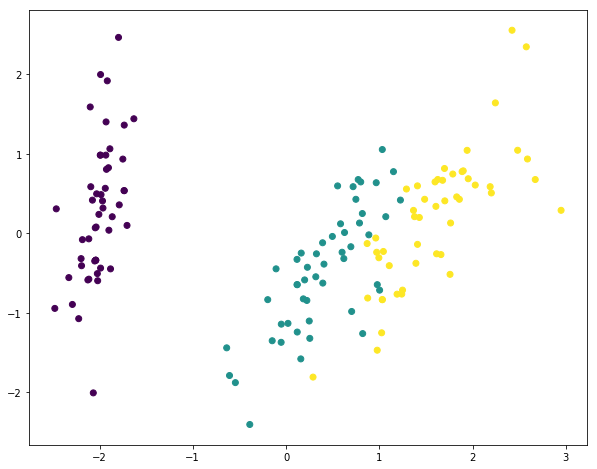

In [7]:
# 根据主成分向量计算降维
scalar = StandardScaler()
X_standard = scalar.fit(X)
fenzu = X_standard.transform(X).dot(pca.components_.T)
plt.figure(figsize=(10,8))
plt.scatter(fenzu[:,0],fenzu[:,1],c=y)
plt.show()

In [8]:
# 根据主成分向量恢复数据并查看差距
(xr.dot(pca.components_)-X_standard.transform(X)).mean()

2.3684757858670008e-17

In [9]:
# 每个主成分的方差
pca.explained_variance_

array([4.22484077, 0.24224357])

In [10]:
# 主成分方差所占百分比
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [11]:
# 对应于每个选定部件的奇异值，奇异矩阵的主主轴数值
pca.singular_values_

array([25.08986398,  6.00785254])

In [12]:
# 数据集每个特征值的平均值
pca.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [13]:
X.mean(axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

# 自己实现PCA算法降维iris

In [14]:
import matplotlib.pyplot as plt
import numpy
from numpy import linalg

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [15]:
iris = datasets.load_iris()
X_source = iris.data
y = iris.target
print(X_source)
type(X_source)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

numpy.ndarray

In [16]:
# 数据标准化
scalar = StandardScaler()
X_standard = scalar.fit(X_source).transform(X_source)
print(X_standard[:5])
print(X_standard.mean(axis=0))
print(X_standard.std(axis=0))

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
[-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
[1. 1. 1. 1.]


In [17]:
#协方差矩阵
covariance = X_standard.T.dot(X_standard)
print(covariance)

[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]


In [18]:
# 奇异值分解
U, Sigma, V = linalg.svd(covariance)
print(U)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [19]:
Sigma

array([436.62271256, 138.18313961,  22.10299175,   3.09115609])

In [20]:
V

array([[-0.52237162,  0.26335492, -0.58125401, -0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [21]:
#查看前两个主成分占比
Sigma[:2].sum()/Sigma.sum()

0.9580097536148197

In [22]:
# 主成分向量
U_reduce = U[:,:2]
U_reduce

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [23]:
X_to_Z = X_standard.dot(U_reduce)
X_to_Z

array([[ 2.26454173e+00, -5.05703903e-01],
       [ 2.08642550e+00,  6.55404729e-01],
       [ 2.36795045e+00,  3.18477311e-01],
       [ 2.30419716e+00,  5.75367713e-01],
       [ 2.38877749e+00, -6.74767397e-01],
       [ 2.07053681e+00, -1.51854856e+00],
       [ 2.44571134e+00, -7.45626750e-02],
       [ 2.23384186e+00, -2.47613932e-01],
       [ 2.34195768e+00,  1.09514636e+00],
       [ 2.18867576e+00,  4.48629048e-01],
       [ 2.16348656e+00, -1.07059558e+00],
       [ 2.32737775e+00, -1.58587455e-01],
       [ 2.22408272e+00,  7.09118158e-01],
       [ 2.63971626e+00,  9.38281982e-01],
       [ 2.19229151e+00, -1.88997851e+00],
       [ 2.25146521e+00, -2.72237108e+00],
       [ 2.20275048e+00, -1.51375028e+00],
       [ 2.19017916e+00, -5.14304308e-01],
       [ 1.89407429e+00, -1.43111071e+00],
       [ 2.33994907e+00, -1.15803343e+00],
       [ 1.91455639e+00, -4.30465163e-01],
       [ 2.20464540e+00, -9.52457317e-01],
       [ 2.77416979e+00, -4.89517027e-01],
       [ 1.

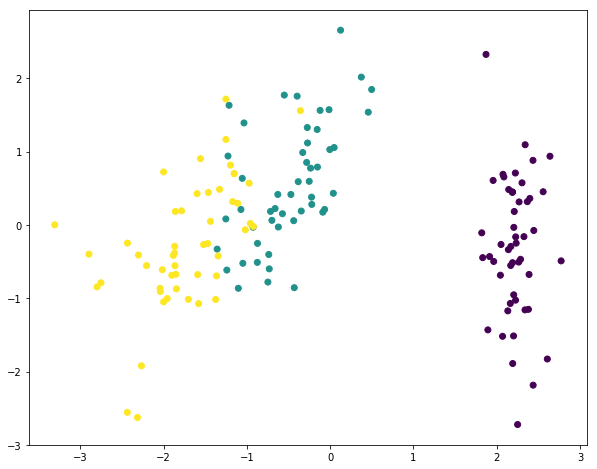

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X_to_Z[:,0],X_to_Z[:,1],c=y)
plt.show()

In [25]:
# 恢复数据
X_approx = X_to_Z.dot(U_reduce.T)
X_approx

array([[-9.94649483e-01,  1.06443573e+00, -1.30560624e+00,
        -1.24776881e+00],
       [-1.33390869e+00, -5.71436925e-02, -1.22656880e+00,
        -1.22297912e+00],
       [-1.35552506e+00,  3.28842647e-01, -1.38309889e+00,
        -1.36017238e+00],
       [-1.41786717e+00,  7.42863254e-02, -1.35146108e+00,
        -1.34091750e+00],
       [-9.96601277e-01,  1.25363164e+00, -1.37425242e+00,
        -1.30697852e+00],
       [-5.16206153e-01,  1.95078853e+00, -1.17147437e+00,
        -1.07178148e+00],
       [-1.24980914e+00,  7.13102071e-01, -1.42000663e+00,
        -1.37844378e+00],
       [-1.07470438e+00,  8.17473916e-01, -1.29320617e+00,
        -1.24728778e+00],
       [-1.63111533e+00, -3.96853762e-01, -1.38437415e+00,
        -1.39627698e+00],
       [-1.31033493e+00,  1.61166989e-01, -1.28164028e+00,
        -1.26728661e+00],
       [-7.31541585e-01,  1.56066151e+00, -1.23495125e+00,
        -1.15365807e+00],
       [-1.15671107e+00,  7.59708020e-01, -1.34945228e+00,
      

In [26]:
# 查看差距
(X_approx - X_standard).mean()

1.4802973661668754e-17

# 结论：自己写的算法没有sklearn的算法的效果好